In [52]:
#importer notre base de données 
import pandas as pd
data = pd.read_excel('bank.xlsx')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [53]:
#importer les bibliothèques nécessaires pour le reste du travail
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

##Preprocessing

In [54]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [55]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [56]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

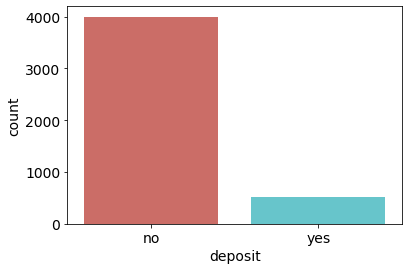

In [58]:
data['deposit'].value_counts()
sns.countplot(x="deposit", data=data, palette='hls')
plt.show()

Ici, notre base est désiquilibré. Donc, on a utilisé la technique SMOTE.

In [60]:
#Label Encoding

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [61]:
data = MultiColumnLabelEncoder(columns = ['job','marital','education', 'default','housing','loan','contact','month','poutcome','deposit']).fit_transform(data)

## SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1

# make a new df made of all the columns, except the target class
X = data.loc[:, data.columns != 'deposit']
y = data['deposit']
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


data= pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [65]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,7,0,2,0,680,1,0,0,6,2,587,2,-1,0,3,1
7996,46,6,1,1,0,35,0,0,0,10,4,482,1,220,7,2,1
7997,52,7,1,1,0,892,0,0,0,7,8,355,1,-1,0,3,1
7998,23,8,2,1,0,2500,0,0,0,26,5,256,4,172,3,2,1


In [66]:
# features
X = data.drop('deposit', axis=1)
print(X)

# target
y=data['deposit']
print(y)

      age  job  marital  education  ...  campaign  pdays  previous  poutcome
0      30   10        1          0  ...         1     -1         0         3
1      33    7        1          1  ...         1    339         4         0
2      35    4        2          2  ...         1    330         1         0
3      30    4        1          2  ...         4     -1         0         3
4      59    1        1          1  ...         1     -1         0         3
...   ...  ...      ...        ...  ...       ...    ...       ...       ...
7995   32    7        0          2  ...         2     -1         0         3
7996   46    6        1          1  ...         1    220         7         2
7997   52    7        1          1  ...         1     -1         0         3
7998   23    8        2          1  ...         4    172         3         2
7999   36    5        1          1  ...         1     -1         0         3

[8000 rows x 16 columns]
0       0
1       0
2       0
3       0
4       0


In [67]:
#Standardisation des variables
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X=data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
Y=data['deposit']
 
# standardization of dependent variables
scaled_X = scale.fit_transform(X) 
scaled_X

array([[-1.05004199,  1.90726246, -0.04467376, ..., -0.48568248,
        -0.40587859,  0.55579446],
       [-0.77409035,  0.8882896 , -0.04467376, ...,  2.82409095,
         1.9410883 , -2.32459142],
       [-0.59012259, -0.13068327,  1.61760581, ...,  2.7364793 ,
         0.18086314, -2.32459142],
       ...,
       [ 0.97360339,  0.8882896 , -0.04467376, ..., -0.48568248,
        -0.40587859,  0.55579446],
       [-1.69392916,  1.22794722,  1.61760581, ...,  1.19840812,
         1.35434658, -0.40433417],
       [-0.49813871,  0.20897435, -0.04467376, ..., -0.48568248,
        -0.40587859,  0.55579446]])

#Regression logistique

In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


## Regression logistique (Gridsearch)

In [69]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

In [ ]:
#Seting the Hyper Parameters
clf_params = {
    #'classifier'   : LogisticRegression(),
    'penalty'      : ['l1','l2','elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['lbfgs'],
    'fit_intercept': [True, False]
}

#Creating the classifier
model = LogisticRegression(random_state=2)

grid_search = GridSearchCV(model, param_grid=clf_params, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

In [71]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8421428571428571
{'C': 0.005, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'lbfgs'}


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 993  199]
 [ 166 1042]]


In [73]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1192
           1       0.84      0.86      0.85      1208

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



##Autre modèles: KNN, Decision Tree, Random Forest, SVM

In [74]:
# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [75]:
seed = 7

# prepare models
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('SVM', SVC(random_state=42)))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

KNN: 0.886071 (0.007354)
CART: 0.891607 (0.011731)
RF: 0.935536 (0.006040)
SVM: 0.892143 (0.015582)


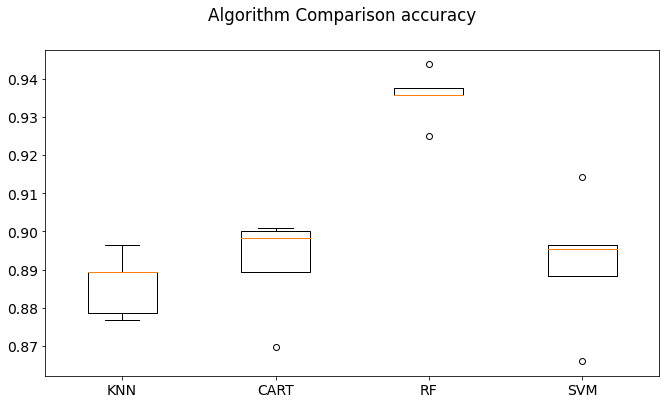

In [81]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Random Forest (Gridsearch)

In [82]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.801 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.822 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.817 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.821 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.823 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.818 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.813 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.845 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='accuracy', verbose=4)

In [83]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9375
{'max_depth': None, 'max_features': 4, 'n_estimators': 150}
